# Making the input and output data

In [2]:
import numpy as np

In [3]:
x_input = np.linspace(0,1000,45) # Creating the input data
print(x_input)

[   0.           22.72727273   45.45454545   68.18181818   90.90909091
  113.63636364  136.36363636  159.09090909  181.81818182  204.54545455
  227.27272727  250.          272.72727273  295.45454545  318.18181818
  340.90909091  363.63636364  386.36363636  409.09090909  431.81818182
  454.54545455  477.27272727  500.          522.72727273  545.45454545
  568.18181818  590.90909091  613.63636364  636.36363636  659.09090909
  681.81818182  704.54545455  727.27272727  750.          772.72727273
  795.45454545  818.18181818  840.90909091  863.63636364  886.36363636
  909.09090909  931.81818182  954.54545455  977.27272727 1000.        ]


As a toy model, the data is synthetically created from the following formula
$$
y_{output} = \sqrt{x_{input}}
$$

In [4]:

y_output = np.sqrt(x_input)
print(y_output)

[ 0.          4.76731295  6.74199862  8.25722824  9.53462589 10.66003582
 11.67748416 12.61312448 13.48399725 14.30193884 15.07556723 15.8113883
 16.51445648 17.18879127 17.8376517  18.46372365 19.06925178 19.65613483
 20.22599587 20.78023536 21.32007164 21.84657244 22.36067977 22.86322971
 23.35496832 23.83656473 24.30862174 24.77168472 25.22624896 25.6727659
 26.11164839 26.54327513 26.9679945  27.38612788 27.79797246 28.20380374
 28.60387768 28.99843256 29.38769068 29.77185981 30.15113446 30.52569707
 30.89571903 31.26136157 31.6227766 ]


# Let's plot the data and see

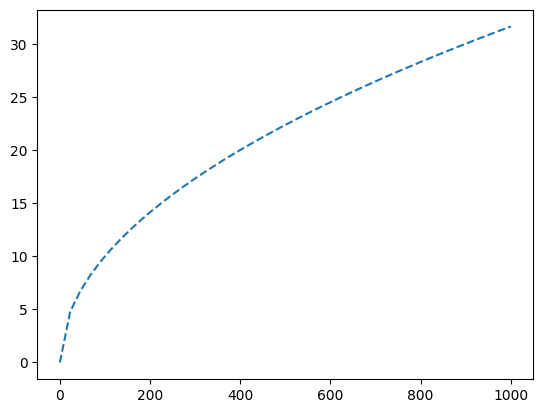

In [5]:
import matplotlib.pyplot as plt
plt.plot(x_input, y_output, '--')  

Our Neural network should be able to match this curve

# Writing Neural Network

In [6]:
import torch as tt

Creating tensors out of input and output

In [7]:
input = tt.from_numpy(x_input).type(tt.float)
output = tt.from_numpy(y_output).type(tt.float)
print(input)  

tensor([   0.0000,   22.7273,   45.4545,   68.1818,   90.9091,  113.6364,
         136.3636,  159.0909,  181.8182,  204.5455,  227.2727,  250.0000,
         272.7273,  295.4546,  318.1818,  340.9091,  363.6364,  386.3636,
         409.0909,  431.8182,  454.5454,  477.2727,  500.0000,  522.7273,
         545.4545,  568.1818,  590.9091,  613.6364,  636.3636,  659.0909,
         681.8182,  704.5455,  727.2727,  750.0000,  772.7273,  795.4545,
         818.1818,  840.9091,  863.6364,  886.3636,  909.0909,  931.8182,
         954.5455,  977.2727, 1000.0000])


I will now split the data into train and test. It is required when data is given but out case this is redundant. This is because I would like to test it on the data which was not actually present in the x_input. But still it is good to learn how to do it

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input, output, test_size=0.2, random_state= 42)

In [9]:
from torch import nn
device = "cuda" if tt.cuda.is_available() else "cpu"
device
print(X_train)

tensor([  68.1818,  136.3636,  545.4545,  727.2727,  431.8182,  386.3636,
         295.4546,  954.5455,  340.9091,  204.5455,  363.6364,  840.9091,
         704.5455,  613.6364,    0.0000,  681.8182,  659.0909,  113.6364,
         250.0000,  750.0000,   22.7273,  909.0909,  477.2727,   45.4545,
         772.7273,  522.7273,  818.1818,  227.2727,  500.0000,  409.0909,
        1000.0000,  454.5454,  159.0909,  318.1818,  636.3636,  863.6364])


# The neural network architecture

This simple example, which is to get started, we will use only one layer. Due to this, the weight matrix is only a number as well as the bias vector.

In [10]:
class themap(nn.Module):
    def __init__(self):
        super().__init__()
        # here I will create two layer with 5 neurons in each. THese are hidden layer different from input and output layer
        self.weights = nn.Parameter(tt.randn(1,dtype=tt.float),requires_grad = True)
        self.bias = nn.Parameter(tt.randn(1,dtype = tt.float), requires_grad= True)

        # Creating the forward pass for computation
    def forward (self, x: tt.Tensor):
        return self.weights*x + self.bias # This is our forward pass

# Set manual seed since nn.Parameter are randomlly initialised
tt.manual_seed(42)

# Creating an instance of the neural network class
first_model = themap()

# check the parameters of the instance by explicitly printing them
list(first_model.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Let's check if the model is working 

In [11]:
with tt.inference_mode():
    y_preds = first_model(X_train)

print(y_preds)
 

tensor([2.3085e+01, 4.6041e+01, 1.8378e+02, 2.4499e+02, 1.4552e+02, 1.3021e+02,
        9.9606e+01, 3.2152e+02, 1.1491e+02, 6.8997e+01, 1.2256e+02, 2.8325e+02,
        2.3734e+02, 2.0673e+02, 1.2881e-01, 2.2969e+02, 2.2204e+02, 3.8389e+01,
        8.4301e+01, 2.5265e+02, 7.7809e+00, 3.0621e+02, 1.6082e+02, 1.5433e+01,
        2.6030e+02, 1.7613e+02, 2.7560e+02, 7.6649e+01, 1.6847e+02, 1.3787e+02,
        3.3682e+02, 1.5317e+02, 5.3693e+01, 1.0726e+02, 2.1439e+02, 2.9091e+02])


# The Loss function

In [12]:
loss_function = nn.MSELoss()

In [13]:
# We will use stochastic gradient descent in this example. This will cause only the linear decrease in the loss later on.
# But this is good enough to learn how to use different optimizers
optimizer = tt.optim.SGD(params=first_model.parameters(),lr=0.000001)

# Testing

In [19]:
# Set the number of epochs
epochs = 100000

# Create emplty loss lists to track the trend 
train_loss_values =[]
test_loss_values = []
epoch_count =[]

for epoch in range(epochs):
    ### Training
    # Put model in training mode
    first_model.train()

    #1 Forward pass on input data using forward() method 
    y_pred = first_model(X_train)

    #2 Calculate the loss 
    loss = loss_function(y_pred, Y_train)

    #3 Putting all the gradient to zero
    optimizer.zero_grad()

    #4 Calculating the gradients of loss w.r.t. the parameters using bakcward pass
    loss.backward()

    #5 Updating the values of the gradient
    #tt.nn.utils.clip_grad_norm_(first_model.parameters(), max_norm=1.0)
    optimizer.step()

    ##### Testing (Not required for our case)
     
    # WIth this command we put the model in evaluation mode
    first_model.eval()

    with tt.inference_mode():
        #1 Forward pass on the test data
        test_pred = first_model(X_test)

        #Calculate the loss
        test_loss = loss_function(test_pred, Y_test.type(tt.float))

        # Printing it out cleanly to understand what is happening epoch by epoch (Learn it)
        if (epoch % 100 & epoch>150) ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MSE train loss: {loss} | MSE test loss: {test_loss}")




Epoch: 0 | MSE train loss: 15.87118148803711 | MSE test loss: 19.855857849121094
Epoch: 1 | MSE train loss: 15.871171951293945 | MSE test loss: 19.8558349609375
Epoch: 2 | MSE train loss: 15.871159553527832 | MSE test loss: 19.855815887451172
Epoch: 3 | MSE train loss: 15.871146202087402 | MSE test loss: 19.855806350708008
Epoch: 4 | MSE train loss: 15.871132850646973 | MSE test loss: 19.855796813964844
Epoch: 5 | MSE train loss: 15.871124267578125 | MSE test loss: 19.85577964782715
Epoch: 6 | MSE train loss: 15.871110916137695 | MSE test loss: 19.85576629638672
Epoch: 7 | MSE train loss: 15.871095657348633 | MSE test loss: 19.855743408203125
Epoch: 8 | MSE train loss: 15.871085166931152 | MSE test loss: 19.855722427368164
Epoch: 9 | MSE train loss: 15.871071815490723 | MSE test loss: 19.855716705322266
Epoch: 10 | MSE train loss: 15.87105941772461 | MSE test loss: 19.855701446533203
Epoch: 11 | MSE train loss: 15.87104606628418 | MSE test loss: 19.855690002441406
Epoch: 12 | MSE train

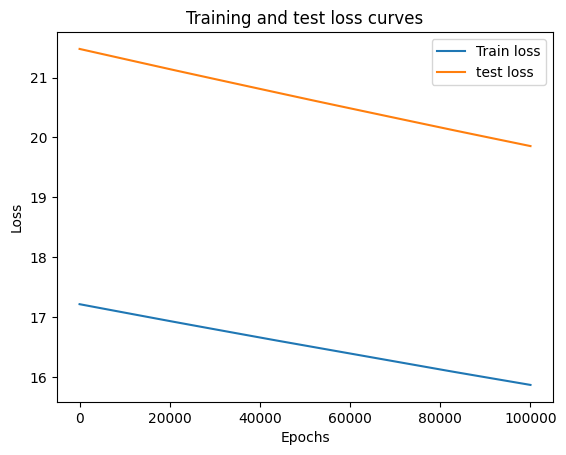

In [18]:
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

As it was predicted, the loss decreases linearly because of the chosen optimizer. Although, it is clear that either we need to increase the number of epochs  or choose another optimizer to achieve desired accuracy, I will end the training here and rather focus on the saving and exporting the model for future use.

# How to save a model

In [25]:
from pathlib import Path

# Creating models directory
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

# Creating model save path
model_name = "square_root_relation.pth"
model_save_path = model_path/model_name

# Save the model state dict
print(f"Saving model to: {model_save_path}")
tt.save(obj=first_model.state_dict(),f=model_save_path)

Saving model to: models/square_root_relation.pth


In [23]:
# Check to see if the model is actually saved
!ls -l models/square_root_relation.pth

-rw-rw-r-- 1 sharad sharad 1997 Sep 30 15:08 models/square_root_relation.pth


# How to load a model

In [27]:
# First create a new instance of the model class
loaded_model = themap()

# now we load the above model with saved state.dict()
loaded_model.load_state_dict(tt.load(f=model_save_path))

<All keys matched successfully>

In [28]:
# To check the model, first we put it in the evaluation mode
loaded_model.eval()

# Now we use context manager to calculate the output of the model 
with tt.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [29]:
print(loaded_model_preds)

tensor([33.6699, 22.0249, 22.8567, 36.9970, 30.3427, 35.3334,  4.5574, 11.2117,
         7.8845])
